In [1]:
import sys, os
sys.path.append(os.path.abspath('..')) # add path

In [2]:
from utils.VizSelector import VizSelector

## Dataset

In [3]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(return_X_y=True, as_frame=True)[0]
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


# Selection 

In [4]:
import pandas as pd
from IPython.display import display
from ipywidgets import widgets, VBox, HTML

## Column Selection

In [5]:
# # Sample DataFrame
# data = {
#     'Name': ['Alice', 'Bob', 'Charlie', 'David'],
#     'Age': [25, 30, 35, 40],
#     'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']
# }

# df = pd.DataFrame(data)

# Global variables to store selected columns
selected_columns = {"Column 1": None, "Column 2": None}

# Function to render the DataFrame with column selection
def render_dataframe_with_column_selection(df):
    global selected_columns
    
    # Create dropdown widgets for column selection
    dropdown1 = widgets.Dropdown(
        options=tuple(df.columns),
        value=df.columns[0],
        description='Column 1',
        disabled=False
    )
    
    dropdown2 = widgets.Dropdown(
        options=tuple(df.columns),
        value=df.columns[1],
        description='Column 2',
        disabled=False
    )
    
    # Create a button to generate the selected columns
    button = widgets.Button(description="Generate")
    
    # Output widget to display the selected columns
    output = widgets.Output()
    
    # Convert the DataFrame to an HTML table
    html_df = df.to_html(index=False, classes='dataframe', border=0)

    # Define the CSS for table alignment
    css = """
    <style>
    .dataframe {
        border-collapse: collapse;
        width: 100%;
    }
    .dataframe th, .dataframe td {
        border: 1px solid #ddd;
        padding: 8px;
    }
    .dataframe th {
        background-color: #f2f2f2;
        text-align: center;
    }
    </style>
    """
    
    # Combine CSS and HTML table
    html_content = widgets.HTML(value=css + html_df)
    
    # Function to handle button click event
    def on_button_click(b):
        global selected_columns
        selected_columns["Column 1"] = dropdown1.value
        selected_columns["Column 2"] = dropdown2.value
        output.clear_output()
        with output:
            display(f"Selected columns: {selected_columns}")
    
    # Bind the button click event to the function
    button.on_click(on_button_click)
    
    # Display the dropdowns, HTML table (as a widget), button, and output
    display(VBox([dropdown1, dropdown2, html_content, button, output]))

## Plot selection

In [15]:
# Global variables to store selected columns
selected_plot = None

# Function to render the DataFrame with column selection
def render_dataframe_with_column_selection(df):
    global selected_plot
    
    drop_down_options = ("hist", "scatter")
    selected_plot = drop_down_options[0]
    # Create dropdown widgets for column selection
    dropdown = widgets.Dropdown(
        options=drop_down_options,
        value="hist",
        description='plot type',
        disabled=False
    )
    
    # Create a button to generate the selected columns
    button = widgets.Button(description="Generate")
    
    # Output widget to display the selected columns
    output = widgets.Output()
    
    # Convert the DataFrame to an HTML table
    html_df = df.to_html(index=False, classes='dataframe', border=0)

    # Define the CSS for table alignment
    css = """
    <style>
    .dataframe {
        border-collapse: collapse;
        width: 100%;
    }
    .dataframe th, .dataframe td {
        border: 1px solid #ddd;
        padding: 8px;
    }
    .dataframe th {
        background-color: #f2f2f2;
        text-align: center;
    }
    </style>
    """
    
    # Combine CSS and HTML table
    html_content = widgets.HTML(value=css + html_df)
    
    # Function to handle button click event
    def on_button_click(b):
        global selected_plot
        selected_plot = dropdown.value
        output.clear_output()
        # with output:
            # display(f"Selected Plot: {selected_plot}")
    
    # Bind the button click event to the function
    button.on_click(on_button_click)
    
    
    # Display the dropdowns, HTML table (as a widget), button, and output
    display(VBox([dropdown, html_content, button, output]))

In [16]:
# Call the function to display the DataFrame with column selection
render_dataframe_with_column_selection(housing.head())

In [20]:
selected_plot

'scatter'

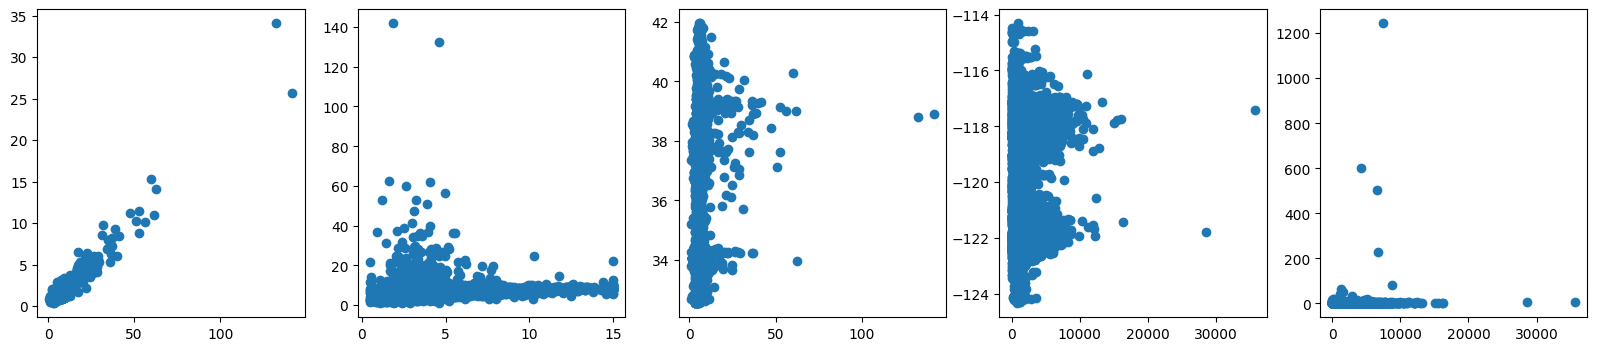

In [21]:
obj = VizSelector.create(housing, selected_plot)
top5 = obj.rank5()
list(map(lambda x: x.get_params()["feature"], obj.rank5()))
obj.plt()